## Goal:
The topic model fit of GTEx has a huge difference between mean and median of the poisson loglikelihood. I want to find out which counts cause the low loglikelihood. 

In [1]:
data_dir = file.path("../../topics_bigdata", "output")
poiss_ll_file = "gtex_nnmf_poissll.csv"

In [2]:
library(readr)
source(file.path("..","code","misc.R"))
source(file.path("..","code","utility.R"))

In [3]:
poiss_ll_file = file.path(data_dir,poiss_ll_file)
p_matrix = read.csv.matrix(poiss_ll_file)
P = nrow(p_matrix)
N = ncol(p_matrix)

In [4]:
sprintf("mean : %f", mean(p_matrix))
sprintf("median : %f", median(p_matrix))

[1] "mean : -115.584061"

[1] "median : -1.722700"

### Comment
There is a huge difference between median and mean, which is not seen in simulated data (-2.9 vs -1.5)

In [5]:
sprintf("quantile:")
quantile(p_matrix, probs = seq(0, 1, by= 0.1)) 

[1] "quantile:"

0%           10%           20%           30%           40% 
-2.313768e+07 -6.488627e+01 -1.485720e+01 -5.752400e+00 -3.152800e+00 
          50%           60%           70%           80%           90% 
-1.722700e+00 -5.406000e-01 -1.187000e-01 -3.020000e-02 -5.400000e-03 
         100% 
 0.000000e+00

In [6]:
quantile(p_matrix, probs = seq(0, 0.1, by= 0.01)) 

0%            1%            2%            3%            4% 
-2.313768e+07 -1.384882e+03 -6.342380e+02 -3.866923e+02 -2.659393e+02 
           5%            6%            7%            8%            9% 
-1.954260e+02 -1.498486e+02 -1.182985e+02 -9.539510e+01 -7.818140e+01 
          10% 
-6.488627e+01

### Comment
Only worst `6%` fitted counts are above the poisson mean.Let's see what they are.

In [21]:
report <- function(qt,p_matrix, n = N,p = P){
    thres = quantile(p_matrix, probs = c(qt))[[1]]
    cat(sprintf("Below Threshold: %f is `bad` \n", thres))
    BelowThres.indx = which(p_matrix < thres, arr.ind = T)
    BelowThres_sample = unique(BelowThres.indx[,2])
    cat(sprintf("num of bad samples: %d, %s in percentage \n", length(BelowThres_sample),
            percent(length(BelowThres_sample)/n)))
    BelowThres_feature = unique(BelowThres.indx[,1])
    cat(sprintf("num of bad features: %d, %s in percentage \n", length(BelowThres_feature),
            percent(length(BelowThres_feature)/p)))
    return(BelowThres.indx)
}

In [22]:
b1 = report(0.07,p_matrix)

Below Threshold: -118.298500 is `bad` 
num of bad samples: 11688, 100.00% in percentage 
num of bad features: 31465, 56.33% in percentage 


In [23]:
b2 = report(0.02,p_matrix)

Below Threshold: -634.238000 is `bad` 
num of bad samples: 11688, 100.00% in percentage 
num of bad features: 22801, 40.82% in percentage 


In [24]:
b3 = report(0.001, p_matrix)

Below Threshold: -13065.693892 is `bad` 
num of bad samples: 11673, 99.87% in percentage 
num of bad features: 7999, 14.32% in percentage 


## Size of the counts of the bad fit

In [6]:
data_file = "gtex.csv"
data_file = file.path(data_dir,data_file)
counts = read.csv.matrix(data_file)

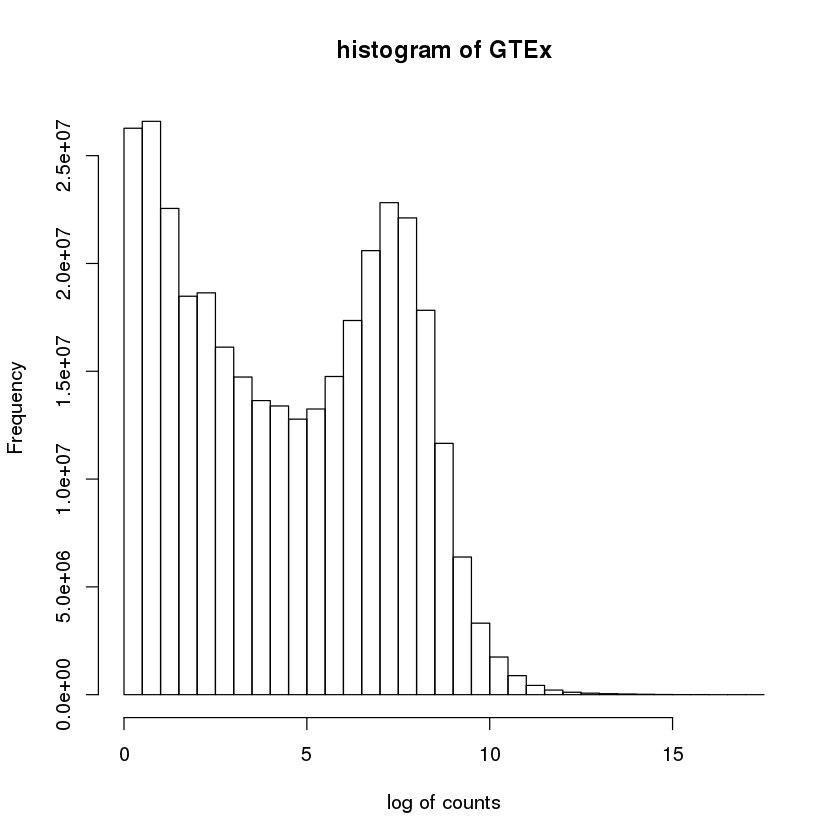

In [27]:
p1 = hist(log(counts), xlab = "log of counts", main = "histogram of GTEx")

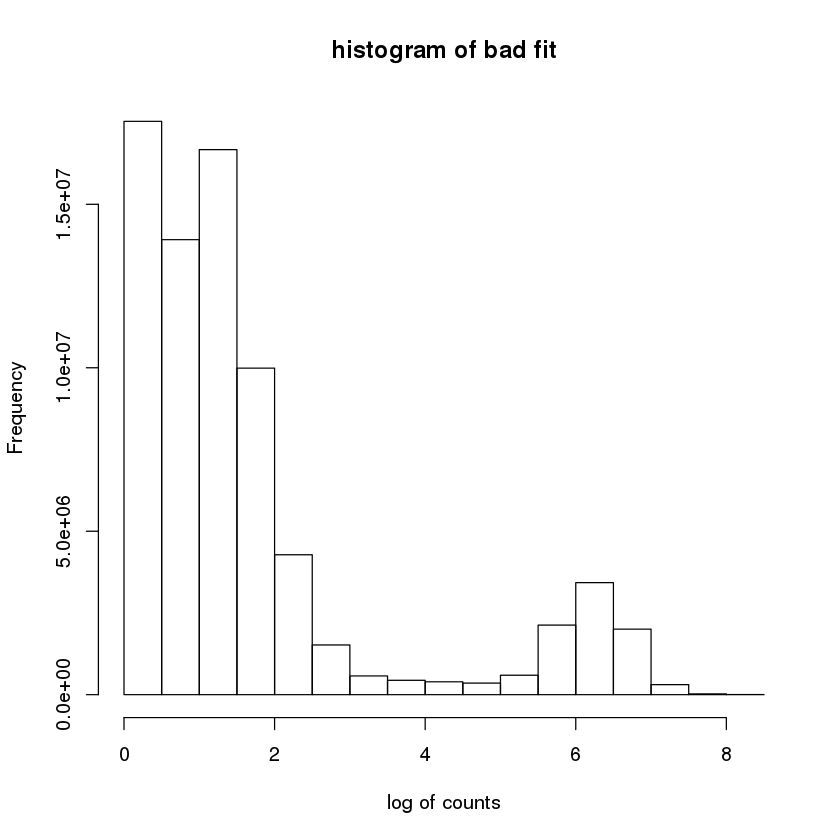

In [26]:
hist(log(counts[t(b1)]), xlab = "log of counts", main = "histogram of bad fit")